## Programmierbeispiel

### Fallbeispiel

#### IntelliJ IDEA

* IDE für Java-Entwickler
* Fast komplett in Java geschrieben
* Großes und lang aktives Projekt

### I. Fragestellung (1/3)

* Schreibe die Frage explizit auf
* Erkläre die Anayseidee verständlich


### I. Fragestellung (2/3)

<b>Frage</b>
* Welche Quellcodedateien sind besonders komplex und änderten sich in letzter Zeit häufig?


### I. Fragestellung (3/3)
#### Umsetzungsideen
* Werkzeuge: Jupyter, Python, pandas, matplotlib
* Heuristiken:
 * "komplex": viele Quellcodezeilen
 * "ändert ... häufig": hohe Anzahl Commits
 * "in letzter Zeit": letzte 90 Tage


**Meta-Ziel:** Grundmechaniken kennenlernen.

### II. Explorative Datenanalyse
* Finde und lade mögliche Softwaredaten
* Bereinige und filtere die Rohdaten

*Wir laden einen Datenexport aus einem Git-Repository.*

In [2]:
import pandas as pd
log = pd.read_csv("dataset/git_log_intellij.csv.gz")
log.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*Wir sehen uns Basisinfos über den Datensatz an.*

In [3]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128819 entries, 0 to 1128818
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   additions  1128819 non-null  object
 1   deletions  1128819 non-null  object
 2   filename   1128819 non-null  object
 3   sha        1128819 non-null  object
 4   timestamp  1128819 non-null  object
 5   author     1128819 non-null  object
dtypes: object(6)
memory usage: 51.7+ MB


<b>1</b> **DataFrame** (~ programmierbares Excel-Arbeitsblatt), <b>6</b> **Series** (= Spalten), <b>1128819</b> **entries** (= Reihen)

*Wir wandeln die Zeitstempel von Texte in Objekte um.*

In [4]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*Wir sehen uns nur die jüngsten Änderungen an.*

In [5]:
# use log['timestamp'].max() instead of pd.Timedelta('today') to avoid outdated data in the future
recent = log[log['timestamp'] > log['timestamp'].max() - pd.Timedelta('90 days')]
recent.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*Wir wollen nur Java-Code verwenden.*

In [6]:
java = recent[recent['filename'].str.endswith(".java")].copy()
java.head() 

,additions,deletions,filename,sha,timestamp,author
27,1,10,platform/smRunner/src/com/intellij/execution/t...,f4ed78c8f574,2019-06-28 18:28:41,Ilya.Kazakevich
29,28,0,platform/smRunner/testSrc/com/intellij/executi...,f4ed78c8f574,2019-06-28 18:28:41,Ilya.Kazakevich
30,6,3,plugins/InspectionGadgets/InspectionGadgetsAna...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko
31,2,2,plugins/InspectionGadgets/test/com/siyeh/igfix...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko
32,2,2,plugins/InspectionGadgets/test/com/siyeh/igfix...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko


### III. Formale Modellierung

* Schaffe neue Sichten
* Verschneide weitere Daten

*Wir zählen die Anzahl der Änderungen je Datei.*

In [7]:
changes = java.groupby('filename')[['sha']].count()
changes.head()

,sha
filename,
RegExpSupport/gen/org/intellij/lang/regexp/_RegExLexer.java,1
RegExpSupport/src/org/intellij/lang/regexp/RegExpCapability.java,1
RegExpSupport/src/org/intellij/lang/regexp/RegExpFileType.java,5
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHost.java,16
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHosts.java,15


*Wir holen Infos über die Code-Zeilen hinzu...*

In [9]:
loc = pd.read_csv("dataset/cloc_intellij.csv.gz", index_col=1)
loc.head()

,language,blank,comment,code
filename,,,,
java/java-tests/testData/psi/resolve/ThinletBig.java,Java,299,1140,20125
java/java-tests/testData/psi/parser-full/declarationParsing/class/LongClass.java,Java,10121,10164,10166
python/gen/com/jetbrains/python/console/protocol/PythonConsoleBackendService.java,Java,1971,591,10086
jps/jps-builders/src/org/jetbrains/jps/api/CmdlineRemoteProto.java,Java,502,3066,8605
plugins/java-decompiler/engine/testData/obfuscated/aj.java,Java,551,1,8043


*...und verschneiden diese mit den vorhandenen Daten.*

In [10]:
hotspots = changes.join(loc[['code']]).dropna(subset=['code'])
hotspots.head()

,sha,code
filename,,
RegExpSupport/gen/org/intellij/lang/regexp/_RegExLexer.java,1,1190.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpCapability.java,1,34.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpFileType.java,5,40.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHost.java,16,92.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHosts.java,15,168.0


### VI. Interpretation
* Erarbeite das Kernergebnis der Analyse heraus
* Mache die zentrale Botschaft / neuen Erkenntnisse deutlich

*Wir zeigen nur die TOP 10 Hotspots im Code an.*

In [11]:
top10 = hotspots.sort_values(by="sha", ascending=False).head(10)
top10

,sha,code
filename,,
platform/structuralsearch/source/com/intellij/structuralsearch/plugin/ui/StructuralSearchDialog.java,83,1097.0
platform/platform-impl/src/com/intellij/idea/IdeaApplication.java,71,366.0
platform/core-impl/src/com/intellij/ide/plugins/PluginManagerCore.java,67,1425.0
platform/platform-impl/src/com/intellij/openapi/project/impl/ProjectManagerImpl.java,65,810.0
platform/lang-impl/src/com/intellij/build/BuildTreeConsoleView.java,63,936.0
java/java-analysis-impl/src/com/intellij/codeInspection/dataFlow/TrackingRunner.java,63,1300.0
platform/platform-impl/src/com/intellij/idea/StartupUtil.java,62,551.0
platform/platform-impl/src/com/intellij/ide/plugins/PluginManagerConfigurableNewLayout.java,60,1284.0
platform/platform-impl/src/com/intellij/ide/ui/laf/darcula/ui/DarculaComboBoxUI.java,59,606.0


### V. Kommunikation
* Transformiere die Erkenntnisse in eine verständliche Visualisierung
* Kommuniziere die nächsten Schritte nach der Analyse

*Wir erzeugen ein XY-Diagramm aus der TOP 10 Liste.*

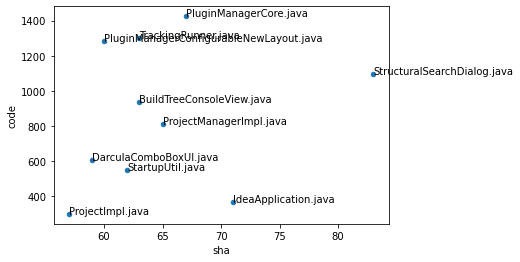

In [12]:
ax = top10.plot.scatter('sha', 'code');

for k, v in top10.iterrows():
    ax.annotate(k.split("/")[-1], v)

Bonus: Welche Dateien ändern sich besonders häufig im Allgemeinen?

In [18]:
most_changes = hotspots['sha'].sort_values(ascending=False)
most_changes.head(10)

filename
platform/structuralsearch/source/com/intellij/structuralsearch/plugin/ui/StructuralSearchDialog.java    83
platform/platform-impl/src/com/intellij/idea/IdeaApplication.java                                       71
platform/core-impl/src/com/intellij/ide/plugins/PluginManagerCore.java                                  67
platform/platform-impl/src/com/intellij/openapi/project/impl/ProjectManagerImpl.java                    65
java/java-analysis-impl/src/com/intellij/codeInspection/dataFlow/TrackingRunner.java                    63
platform/lang-impl/src/com/intellij/build/BuildTreeConsoleView.java                                     63
platform/platform-impl/src/com/intellij/idea/StartupUtil.java                                           62
platform/platform-impl/src/com/intellij/ide/plugins/PluginManagerConfigurableNewLayout.java             60
platform/platform-impl/src/com/intellij/ide/ui/laf/darcula/ui/DarculaComboBoxUI.java                    59
java/structuralsearch-java/s

*Wir visualisieren dies mit einem einfachen Liniendiagramm.*

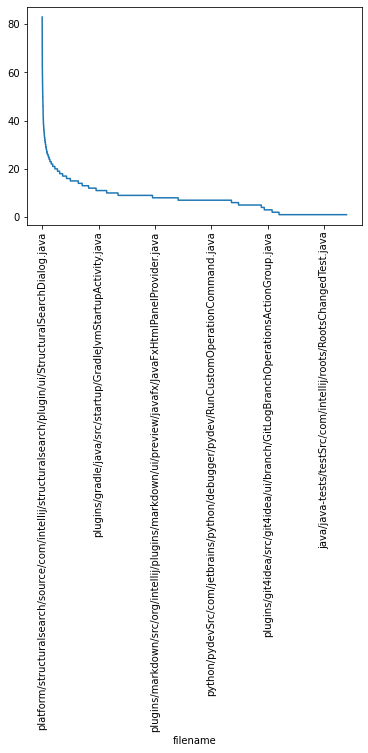

In [19]:
most_changes.plot(rot=90);

### Ende der Demo